# 2D Data: Correlation and Pairwise Effects

In some datasets, the key point of interest is the relationship between two variables. Important experimental examples would be:

* paried designs (where pairs of participants are compared, to balance out external variables) - for example: 
    * patients and control participants may be matched on age and sex
* Repeated measures designs, where the same participant completes all conditions in the experiment
    * A patient's blood pressure before and after taking a drug
    * Reaction time on the same task with and without distraction
    
Here is a video about paired vs unpaired designs:

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/yq5RF2MCN7Y?si=1XDbQKpZP-KYSoWG" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

If we want to see the relationship between paired measurements, we need a type of plot that shows that relationship. Good examples are:

* scatterplot `sns.scatterplot()`
* scatterplot with regression line `sns.regplot()`
* 2D histogram `sns.histplot()`
* 2D KDE plot `sns.kde()`

Here is a video about plotting paired measurements:

In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/lVHzI2Ktd_s?si=_112tUvkxO9ESikm" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Example: brother/sister heights


<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/tallVshort.jpg" width=30% alt="A picture of people of different heights"  />

A researcher hypothesises that men are taller than women.

He also notices that there is a considerable genetic influence on height, with some families being taller than others

He decides to control for this by comparing the heights of brothers and sisters (shared genetic influence, shared upbringing). This is a <b>paired</b> design.

I have provided some made-up data

**Note** that datasets with multiple measurements for each individual tend to be presented as **wideform** tables - that is, with one **row** per 'case' (person, family etc) and one **column** per variable measured - the plotting examples below therefore use wideform data.

A solution for longform data is covered briefly at the end of this notebook

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [3]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

### Load and inspect the data

Load the file BrotherSisterData.csv which contains heights in cm for 25 fictional brother-sister pairs

In [4]:
heightData = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BrotherSisterData.csv')
display(heightData)

,brother,sister
0,174,172
1,183,180
2,154,148
3,172,180
4,172,165
5,161,159
6,167,159
7,172,164
8,195,188
9,189,175


### Independent KDE plots

Let's use a KDE plot to compare the heights of the men (brothers) and women (sisters) in the sample.

We can call KDE plot twice to plot the data from brothers and sisters overlayed

Text(0.5, 0, 'height (cm)')

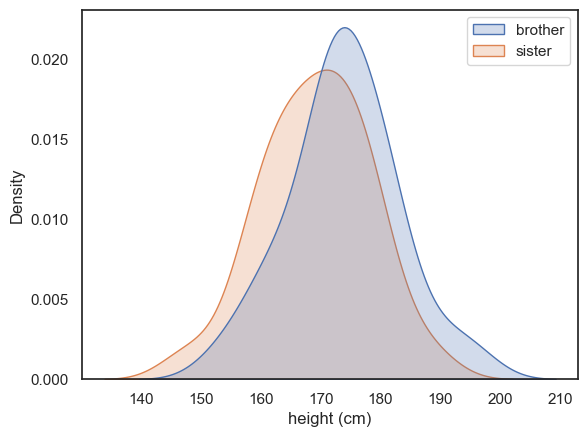

In [5]:
sns.kdeplot(data=heightData, fill=True)
plt.xlabel('height (cm)')

There's a lot of overlap for sure, and just a hint that the men are taller than the women. 

But comparing all the men to all the women is wasting the power of our paired design! We deliberated measured brother-sister pairs in the hope of "cancelling out" shared genetic or environmental influences within families. We therefore need to ask if each brother is taller than his own sister.

## Scatterplot

On a scatterplot, each dot represents **two** people - a brother and sister:

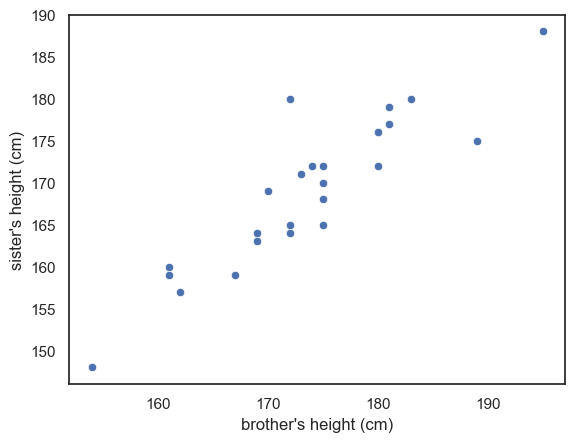

In [6]:
sns.scatterplot(data=heightData, x='brother', y='sister')
plt.xlabel("brother's height (cm)")
plt.ylabel("sister's height (cm)")
plt.show()

sex,Female,Male
familyID,,
118173,165,172
136536,169,170
165826,179,181
185965,172,175
218511,159,161
260033,148,154
327878,177,181
330754,180,172
342207,172,180


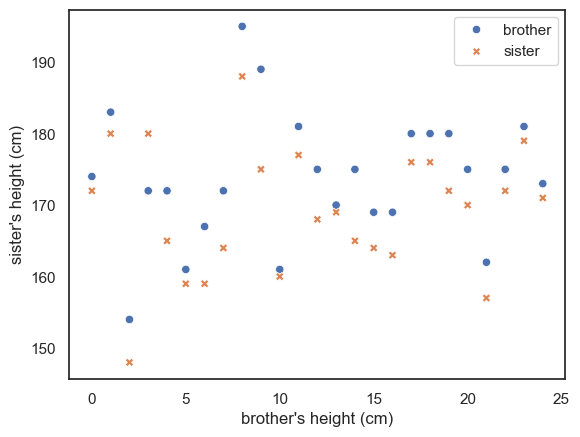

In [7]:
sns.scatterplot(data=heightData)
plt.xlabel("brother's height (cm)")
plt.ylabel("sister's height (cm)")
plt.show()

#### Between-pairs effect (correlation)

Notice that in the scatterplot, the data points are spread out along a diagonal line, or to put it another way, height of brothers and sisters is correlated across families.

This means that in general tall brothers have tall sisters and this variation between families rather dwarfs the effect of interest (that within each family the brother is taller than his own sister)

This feature of the plot is evidence that a paired design was a particularly good choice for this question - in the paired design, the (large) variation between families is cancelled out allowing us to detect the (small) difference between male and females.

#### Within-pairs effect (pairwise difference)

The family effect is actually "noise" in this study - what we really want to know is not whether some families are taller than others, but whether the male sibling in each family is taller than the female sibling once the family effect is accounted for (by compaaring only within families). 

To help us visualise this we add a **reference line**.

### Reference line

If all the brothers were exactly the same height as their sisters, we would expect all data points to fall exactly on the line $x=y$

If brothers were roughly the same height as their sisters (with some random variation) we would expect the data points to fall equally often above and below the line $x=y$

If brothers are generally taller than their sisters, most of the datapoints will fall on one side of the line (think about which!)


To add the line $x=y$ we use the `matplotlib` function `plt.plot()`. The arguments of this function are the $x$ and $y$ values for the ends of the line ($x$ and $y$ both range from 150-190), and the argument 'r--' which sets the color and line type.


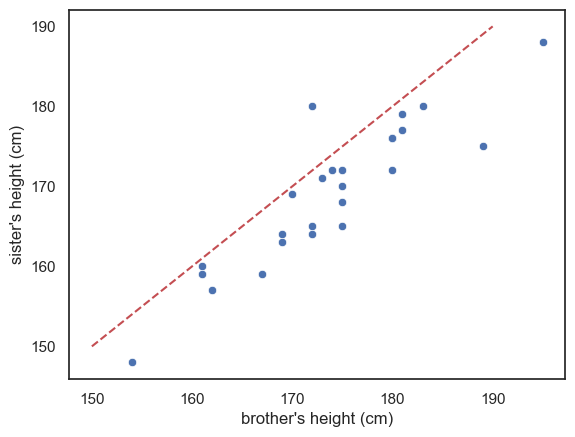

In [8]:
sns.scatterplot(data=heightData, x='brother', y='sister')
plt.xlabel("brother's height (cm)")
plt.ylabel("sister's height (cm)")
plt.plot([150, 190],[150, 190], 'r--')
plt.show()

Look at the graph - most of the datapoints fall on one side of the line (below it)

* This means either than most of the brothers are taller than their sisters, or vice versa - which is it (look at the graph)?

#### Exercise

See if you can add another line of code to draw a red horizontal line at y=170

### Reference line is not a regression line
    
More commonly, when you see a line on a scatter plot, the line is a regression line (more detail below). It can be helpful to add other reference lines, such as the line $x=y$, but I suggest you use obvious colouring (eg a red dashed line) to distinguish them from a regression line, and **clearly state in the figure description** (ie the text under the figure) that the red dashed line is the line $x=y$ for reference

## Scatterplot with regression line

Sometimes we are interested in the between-pairs effect. For example we might be interested in the shared effect of genetics/environment, and would like to make a prediction along the lines 'for each additional cm in height of the brother, we expect the height of his sister to increase by 0.8cm'

We will cover regression analysis later in the course

Here I just want to introduce a version of the scatterplot which includes the best fitting regression line, `sns.regplot()`

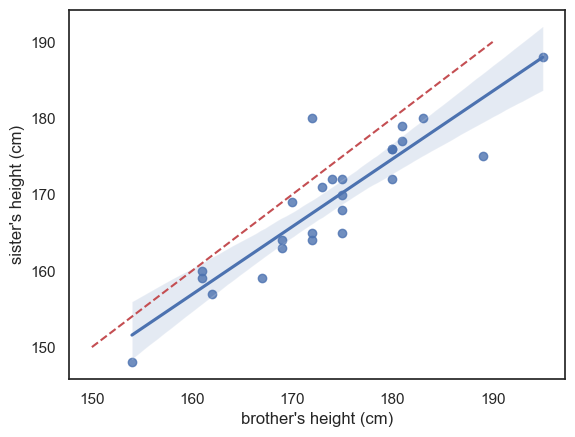

In [9]:
sns.regplot(data=heightData, x='brother', y='sister')
plt.plot([150, 190],[150, 190], 'r--')
plt.xlabel("brother's height (cm)")
plt.ylabel("sister's height (cm)")
plt.show()

The blue line is the regression line (and the shading represents a confidence interval for the regression line - we will cover confidence intervals in detail later but basically, it reflects the fact that we are not totally sure this sample reflects all men and women in the popluation; we expect the 'true' regression line to fall somewhere in the shaded region)

I've also included (red dashed line) the line $x=y$ for reference - we can see that the regression line *is not the same* as the line $x=y$ - it falls to one side of $x=y$ and has a slightly different slope.

If these ideas (regression line and confidence interval) are unfamiliar please think no more about it - they will be covered later in the course, but I mention this plot here so you have all commonly used plots in one chapter for revision.

## Jointplot

A disadvantage of the scatterplot is that we lose the ability to see the shape of each distribution (brothers' and sisters' heights), which we would get from a histogram or KDE plot 

* is the distribution of heights symmetrical or skewed?
* is the distribution unimodal or bimodal

We can get 'the best of both worlds' by using <tt>seaborn</tt> function <tt>jointplot</tt>, which shows the <b>marginal</b> distributions (the height distributions for brothers and sisters separately) at the side of the main scatter plot

[]

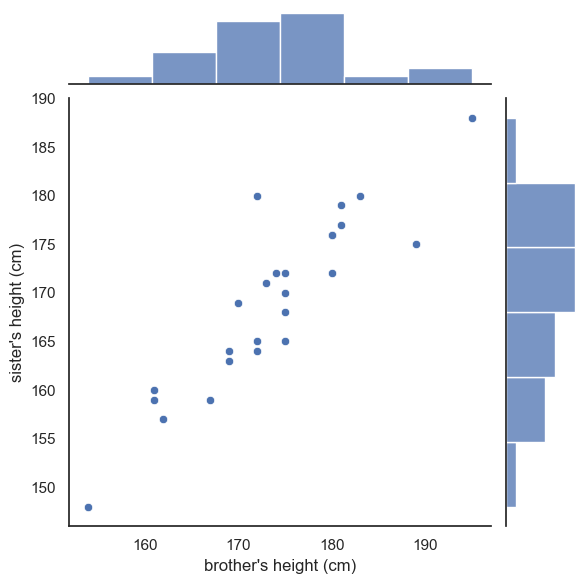

In [10]:
sns.jointplot(data=heightData, x='brother', y='sister')
plt.xlabel("brother's height (cm)")
plt.ylabel("sister's height (cm)")
plt.plot()

Since this plot is now made up of three axes (the main scatter plot and the two marginal histograms), if we want to adjust one of those axes, we use a set of arguments in a `dictionary`:
* `marginal_kws` are keyword argumments for the marginal histograms
* `joint_kws` are keyword arguments for the scatterplot itself

You can probably just copy this syntax without worrying too much about understanding it as we don't make heavy use of dictionaries in this course.

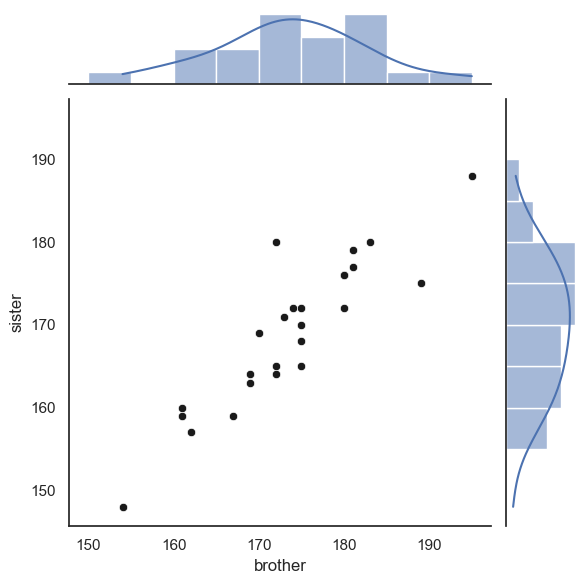

In [11]:
sns.jointplot(data=heightData, x='brother', y='sister', kind='scatter', 
              marginal_kws=dict(bins=range(150,200,5), kde="true"), 
              joint_kws=dict(color='k'))
plt.show()


Finally, we can add the line $x=y$. 

This is a little fiddly and you will not be required to do this in an assessment - however I include it for your future reference

As the plot consists of several axes, we have to tell the computer which part of the the joint plot to add the line to, by getting a *handle* to the plot (see comments in the code)

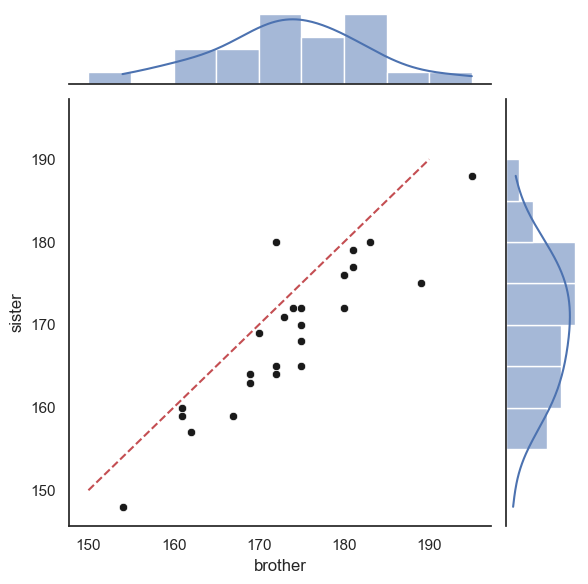

In [12]:
# create the joint plot as before but give it a label - "myfig"
myfig = sns.jointplot(data = heightData, x='brother', y='sister', kind='scatter',
                      marginal_kws=dict(bins=range(150,200,5), kde="true"),
                      joint_kws=dict(color='k'))

# plot the line x=y onto the joint axis (ax_joint) of myfig
myfig.ax_joint.plot([150,190],[150,190],'r--')

plt.show()

## 2D Histogram

The functions `sns.histplot()` and `sns.kde()` can actuaally be used for two dimensional data. 

Here is a histplot for our brother-sister height data, with the scatterplot overlaid:

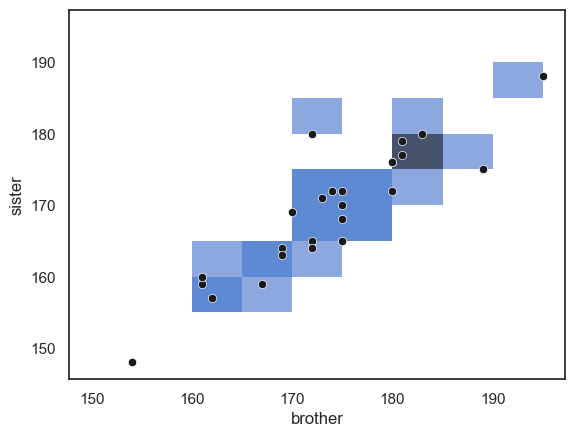

In [13]:
sns.histplot(data=heightData, x='brother', y='sister', bins=range(150,200,5))
sns.scatterplot(data=heightData, x='brother', y='sister', color='k')

plt.show()

... Note that areas (squares) with more data points in them are darker blue.

### Large datasets

A 2D histogram or KDE plot is particularly useful when a dataset is too large to be successfully visualized using a scatterplot.

For example, consider the following dataset containing heights, weight and gender for 10,000 (fictional) people.

In [14]:
hws = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/weight-height.csv')
display(hws)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Let's try making a scatterplot of the data:

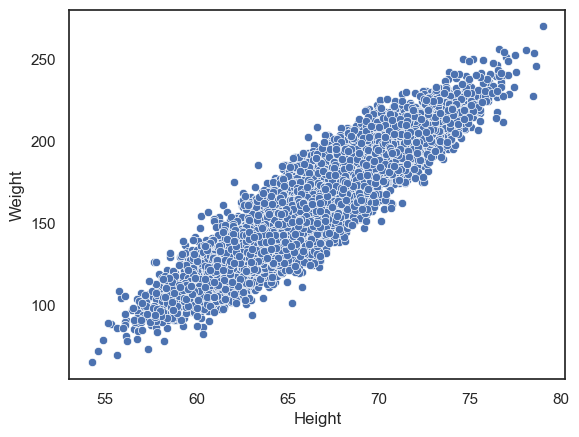

In [15]:
sns.scatterplot(data=hws, x='Height', y='Weight')
plt.show()

We can clearly see a positive correlation between weight and height, but it is hard to see any detail about the relationship as the dots are packed so closely together.

We can try instead to plot a 2D histogram:

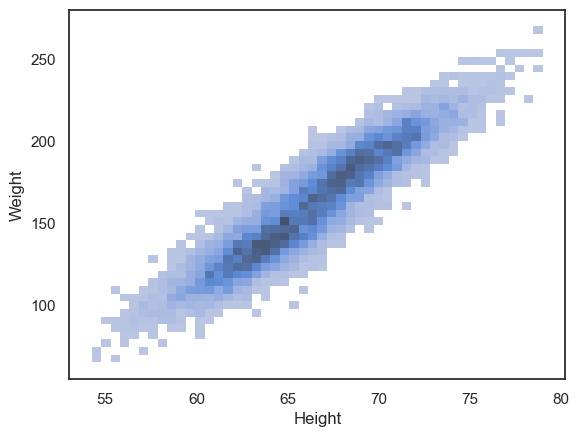

In [16]:
sns.histplot(data=hws, x='Height', y='Weight')
plt.show()

We can now see that the density of datapoints is higher in the middle of the cloud, and interestingly can see a hint that there are two separate peaks within the data distribution (look closely - the dark region of the histogram dips in the middle).

The reason for this becomes clearer if we plot the data separately for men and women:

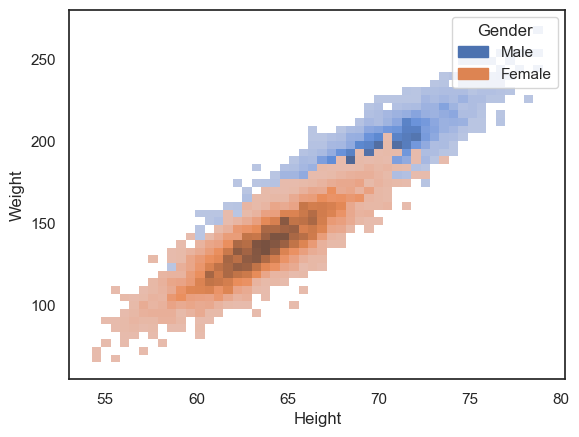

In [17]:
sns.histplot(data=hws, x='Height', y='Weight', hue='Gender')
plt.show()

However, the data cloud for women is now occluding the data cloud for men.

Another option is to use the 2D KDE plot, which produces a kind of contour map (equivalent to the kind fo map you would take hill walking):

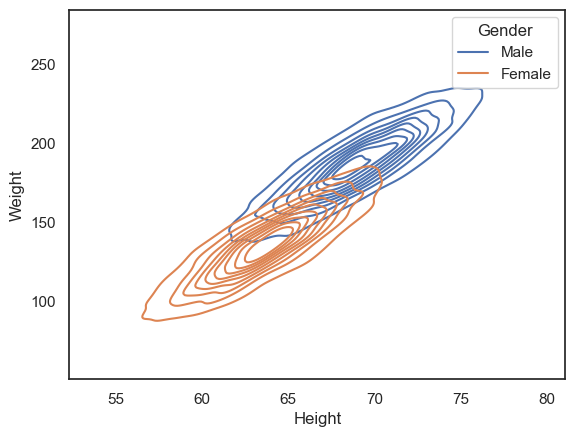

In [18]:
sns.kdeplot(data=hws, x='Height', y='Weight', hue='Gender')
plt.show()

### Customization

All the plots above can be customized to highlight features of interest in the data.

Particularly relevant tweaks for these plot types are:

- `alpha` - a number between 0 and 1 - makes plots semi-transparent when close to 0
- `colormap`

You can learn more on the `seaborn` reference pages for <a href=https://seaborn.pydata.org/generated/seaborn.histplot.html><tt>sns.histplot()</tt></a>, <a href=https://seaborn.pydata.org/generated/seaborn.kdeplot.html><tt>sns.kdeplot()</tt></a> and <a href=https://seaborn.pydata.org/generated/seaborn.scatter.html><tt>sns.scatter()</tt></a>.

## Longform vs wideform data

Data tables can be either longform, or wideform. 

In wideform (as in the examples above), each row corresponds to one 'case' or 'record' and each column corresponds to one variable

In the two examples above we have:
* records = families; variables = height of brother, height of sister
* records = individuals; variables = sex, height, weight

In longform data, the grouping variables are given in a column - for example in the following longform version of the brother/sister heights data, we can tell which brother and sister belong to the same family by checking the `familyID` variable.



In [19]:
heightDataLongform = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BrotherSisterDataLongform.csv')
heightDataLongform

,familyID,sex,height
0,410119,Male,174
1,438181,Male,183
2,260033,Male,154
3,330754,Male,172
4,118173,Male,172
5,218511,Male,161
6,934515,Male,167
7,936244,Male,172
8,608784,Male,195
9,700114,Male,189



When we have multiple measurements one individual, wideform often seems more natural. Examples in which we would have multiple measurements for one individual are:
* test scores before- and after- an intervention
* multiple health metrics such as weight, blood pressure and pulse
* responses to multiple questions in a survey
* data on a single variable for paired individuals (such as height of brother/sister or husband/wife pairs)

Why would we ever use the longform format?
* when the number of measurements in each 'record' or 'group' is variable (eg heights of all siblings in each family - the number of siblings will vary across families)

## Converting longform to wideform

To convert longform data to wideform (for use with plotting functions such as `sns.scatterplot` and `sns.regplot`) we use the `pandas` function `df.pivot`

We need to tell `df.pivot` which variable to group by (that is, which variable indexs the datapoints that belong together), which variable to use to sort data into different columns, and which variable contains the data values (that will eventually be plottted).

Here is how it works for converting the brother/sister heights longform data into wideform:

In [20]:
heightDataWideform = heightDataLongform.pivot(index='familyID', columns='sex', values='height')
heightDataWideform

sex,Female,Male
familyID,,
118173,165,172
136536,169,170
165826,179,181
185965,172,175
218511,159,161
260033,148,154
327878,177,181
330754,180,172
342207,172,180
